In [1]:
import sys, os

# adjust if built Debug instead of Release
build_dir = os.path.abspath("../build/Release")
if build_dir not in sys.path:
    sys.path.insert(0, build_dir)
import volpy as vp

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

In [3]:
S = 100.0
r = 0.04
q = 0.0
Ts = [1.0 , 5.0, 10.0]
Ks = np.linspace(60, 140, 20)
is_call = True

In [4]:
def synthetic_vol(K, S):
    return 0.2 + 0.05*np.log(K / S)

In [5]:
slices = []
for T in Ts:
    options = []
    mids = []
    for K in Ks:
        opt = vp.OptionSpec(S, K, r, q, T, is_call)
        price = vp.bs_price(S, K, r, q, T, synthetic_vol(K, S), is_call)
        options.append(opt)
        mids.append(price)
    ms = vp.MaturitySlice()
    ms.options = options
    ms.mids = mids
    slices.append(ms)
surface = vp.calibrate_surface(slices)

In [6]:
T_grid = np.linspace(min(Ts), max(Ts))
K_grid = np.linspace(min(Ks), max(Ks))
vols = np.zeros((len(T_grid), len(K_grid)))
for i, T in enumerate(T_grid):
    for j, K in enumerate(K_grid):
        vols[i, j] = surface.implied_vol(S, K, r, q, T)

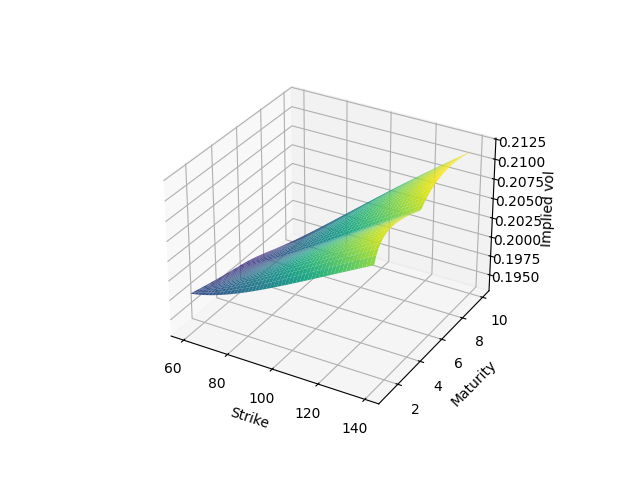

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
TT, KK = np.meshgrid(T_grid, K_grid, indexing = 'ij')
ax.plot_surface(KK, TT, vols, cmap = 'viridis')
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied vol')
plt.show()